# Fantasy Premier League Points Prediction Using Weighted Moving Average

### 1. Extract Data
#### 1.1. Selected Players Data Frame

In [121]:
import pandas as pd

pd.set_option('display.max_rows', 100)
players_df = pd.read_csv('players.csv').set_index('idplayers')
players_df.head(84)

,name,club,position
idplayers,,,
DEF1,Rayan Ait Nouri,WOL,DEF
DEF10,Timothy Castagne,LEI,DEF
DEF11,Jannik Vestergaard,SOU,DEF
DEF12,Reece James,CHE,DEF
DEF13,Gabriel Magalhães,ARS,DEF
DEF14,Thiago Thiago,CHE,DEF
DEF15,Ola Aina,FUL,DEF
DEF16,Aymeric Laporte,MCI,DEF
DEF17,Ezri Konsa Ngoyo,AVL,DEF


#### 1.2. Gameweeks Players' Performance Data Frame

In [122]:
gw_perform_df = pd.read_csv('performance.csv')
gw_perform_df

,entry_id,player_id,club,points,bps,ict_index,gameweek,fdr
0,GW01011,DEF1,WOL,0,0,0.0,1,4
1,GW02011,DEF1,WOL,0,0,0.0,2,4
2,GW03011,DEF1,WOL,0,0,0.0,3,2
3,GW04011,DEF1,WOL,0,0,0.0,4,2
4,GW05011,DEF1,WOL,0,0,0.0,5,2
...,...,...,...,...,...,...,...,...
647,GW04044,MID9,MUN,6,21,7.5,4,3
648,GW05044,MID9,MUN,11,49,22.0,5,3
649,GW06044,MID9,MUN,3,14,9.6,6,3
650,GW07044,MID9,MUN,2,7,3.5,7,3


#### 1.3. Club's Fixture Difficulty Rating (FDR) Data Frame

In [123]:
fdr_df = pd.read_csv('fdr.csv').set_index(['club_id','gameweek'])
fdr_df

f_entryid                club_name  fdr
club_id gameweek                                        
ARS     1          ARSGW01                  Arsenal    2
        2          ARSGW02                  Arsenal    2
        3          ARSGW03                  Arsenal    5
        4          ARSGW04                  Arsenal    3
        5          ARSGW05                  Arsenal    5
...                    ...                      ...  ...
WOL     5          WOLGW05  Wolverhampton Wanderers    2
        6          WOLGW06  Wolverhampton Wanderers    2
        7          WOLGW07  Wolverhampton Wanderers    2
        8          WOLGW08  Wolverhampton Wanderers    4
        9          WOLGW09  Wolverhampton Wanderers    2

[176 rows x 3 columns]

### 2. Relationship Between Gameweek Points and Bonus Points System (BPS)

Regression Equation:  0.2684573935334311 * x + ( -0.09700316634244288 )
R2-score: 0.85


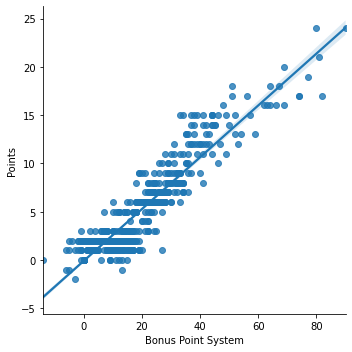

In [124]:
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
x = gw_perform_df[['bps']]
y = gw_perform_df[['points']]
regr.fit (x, y)

#Plotting
bps_plot = sns.lmplot(data=gw_perform_df, x='bps', y='points')
bps_plot.set_axis_labels('Bonus Point System', 'Points')

# The coefficients
print ('Regression Equation: ', regr.coef_[0][0], '* x', '+ (', regr.intercept_[0], ')')
y_hat = regr.predict(x)
print("R2-score: %.2f" % r2_score(y_hat, y))

### 3. Points Prediction Based On 3 Previous Gameweeks' Points and BPS
#### 3.1. Function To Predict Points

In [125]:
import numpy as np

def w_avg_predict(player_id, gw_start, record_value, weight, subset_num):
    len_value = len(record_value) + 1
    predicted = np.empty(len_value)
    predicted.fill(np.nan)
    p_id = []
    gw = gw_start[:]
    for i in range(subset_num, len_value):
        div = 0
        for idx in range(subset_num,0,-1):
            div += weight[i-idx]
        #print('div =', div)
        pred = 0                
        for ix in range(subset_num,0,-1):
            t = record_value[i-ix] * (weight[i-ix] / div)
            pred += t
        #print('pred =', pred)
        predicted[i] = pred
        p_id.append(player_id)
        gw.append(gw[-1] + 1)
    return p_id, gw, predicted

#### 3.2. Create Subset Data Based On Player ID

In [126]:
subset = 3 # Number of previous gameweeks to predict
act_pts = [] # Actual gameweek's points
act_bps = [] # Actual gameweek's BPS
wfdr = []    # FDR for prediction weigth
uni_id = set(gw_perform_df['player_id']) # Set of unique player ID
gw_start = []
for uid in uni_id:
    pts = list(gw_perform_df['points'].loc[gw_perform_df['player_id'].isin([uid])])
    bps = list(gw_perform_df['bps'].loc[gw_perform_df['player_id'].isin([uid])])
    fdr = list(gw_perform_df['fdr'].loc[gw_perform_df['player_id'].isin([uid])])
    gws = list(gw_perform_df['gameweek'].loc[gw_perform_df['player_id'].isin([uid])])
    act_pts.append(pts)
    act_bps.append(bps)
    wfdr.append(fdr)
    gw_start.append(gws[0:subset])

#### 3.3. Predict Players' Points In Each Gameweeks

In [127]:
player_id = []  
gameweek = []
pred_pts = []      # Points prediction results using previous gameweeks' points
pred_bps = []      # BPS prediction results using previous gameweeks' BPS
pred_bps_pts = []  # Points prediction results using bps vs points linear regression equation
for pid, gws, p, b, w in zip(uni_id, gw_start, act_pts, act_bps, wfdr):
    player_id.extend([pid]*subset)
    p_id, gw, pts = w_avg_predict(pid, gws, p, w, subset)
    p_id, gw, bps = w_avg_predict(pid, gws, b, w, subset)
    bps_pts = [0.27 * x - 0.144 for x in bps]
    player_id.extend(p_id)
    gameweek.extend(gw)
    pred_pts.extend(pts)
    pred_bps.extend(bps)
    pred_bps_pts.extend(bps_pts)

#### 3.4. Summarize Prediction Result In Result Data Frame

In [128]:
result_dict = {'player_id': player_id,
               'gameweek': gameweek,
               'wmap_pts_predict': pred_pts,
               'wmap_bps_predict': pred_bps,
               'bps_pts_predict': pred_bps_pts}
result_df = pd.DataFrame.from_dict(result_dict, orient='index')
result_df = result_df.transpose()
result_df

,player_id,gameweek,wmap_pts_predict,wmap_bps_predict,bps_pts_predict
0,MID9,2,NaN,NaN,NaN
1,MID9,3,NaN,NaN,NaN
2,MID9,4,NaN,NaN,NaN
3,MID9,5,6.57143,24.1429,6.37457
4,MID9,6,9.375,36.25,9.6435
...,...,...,...,...,...
731,DEF28,5,3.22222,16.2222,4.236
732,DEF28,6,3.8,18,4.716
733,DEF28,7,3,14.8,3.852
734,DEF28,8,2.88889,15.8889,4.146


#### 3.5. Join Data Frames For Prediction Evaluation

In [129]:
# Set index in gw_perform_df to 'player_id', and 'gameweek'
gw_perform_df = gw_perform_df.set_index(['player_id', 'gameweek'])

In [130]:
final_df = result_df.join(gw_perform_df, on=['player_id','gameweek'])
final_df = final_df.drop(['club','entry_id','fdr'], axis=1)
final_df = final_df.join(players_df, on=['player_id'])
final_df = final_df.join(fdr_df, on=['club','gameweek'])
final_df = final_df.drop(['f_entryid', 'club'], axis=1)

# Rearrange columns
col_order = ['player_id','name','position','club_name','gameweek','fdr','ict_index',
             'bps','points','wmap_bps_predict','wmap_pts_predict', 'bps_pts_predict']
final_df = final_df[col_order].set_index('player_id')
final_df.head()

,name,position,club_name,gameweek,fdr,ict_index,bps,points,wmap_bps_predict,wmap_pts_predict,bps_pts_predict
player_id,,,,,,,,,,,
MID9,Bruno Miguel Borges Fernandes,MID,Manchester United,2,2,12.9,13.0,2.0,NaN,NaN,NaN
MID9,Bruno Miguel Borges Fernandes,MID,Manchester United,3,2,12.0,40.0,12.0,NaN,NaN,NaN
MID9,Bruno Miguel Borges Fernandes,MID,Manchester United,4,3,7.5,21.0,6.0,NaN,NaN,NaN
MID9,Bruno Miguel Borges Fernandes,MID,Manchester United,5,3,22.0,49.0,11.0,24.1429,6.57143,6.37457
MID9,Bruno Miguel Borges Fernandes,MID,Manchester United,6,3,9.6,14.0,3.0,36.25,9.375,9.6435


### 4. Prediction Model Evaluation
#### 4.1. Create Unaggreated Evaluation Metrics Data Frame

In [131]:
eval_df = result_df[['player_id','gameweek','wmap_pts_predict','bps_pts_predict']].copy()
eval_df = eval_df.join(gw_perform_df, on=['player_id','gameweek'], how='inner')
eval_df = eval_df.drop(['entry_id','club','bps','ict_index','fdr'], axis=1)
eval_df.head()

,player_id,gameweek,wmap_pts_predict,bps_pts_predict,points
0,MID9,2,NaN,NaN,2
1,MID9,3,NaN,NaN,12
2,MID9,4,NaN,NaN,6
3,MID9,5,6.57143,6.37457,11
4,MID9,6,9.375,9.6435,3


In [132]:
import numpy as np

# Evaluation of predicted values using previous average points
eval_df['pts_error'] = eval_df.points - eval_df.wmap_pts_predict
eval_df['pts_abs_error'] = np.abs(eval_df.points - eval_df.wmap_pts_predict)
eval_df['pts_sq_error'] = np.square(eval_df.points - eval_df.wmap_pts_predict)
eval_df['pts_abs_%_error'] = np.abs(eval_df.pts_error / eval_df.points)

# Evaluation of predicted values using previous average bonus point system
eval_df['bps_error'] = eval_df.points - eval_df.bps_pts_predict
eval_df['bps_abs_error'] = np.abs(eval_df.points - eval_df.bps_pts_predict)
eval_df['bps_sq_error'] = np.square(eval_df.points - eval_df.bps_pts_predict)
eval_df['bps_abs_%_error'] = np.abs(eval_df.bps_error / eval_df.points)

eval_df.head(10)

,player_id,gameweek,wmap_pts_predict,bps_pts_predict,points,pts_error,pts_abs_error,pts_sq_error,pts_abs_%_error,bps_error,bps_abs_error,bps_sq_error,bps_abs_%_error
0,MID9,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MID9,3,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MID9,4,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MID9,5,6.57143,6.37457,11,4.42857,4.42857,19.6122,0.402597,4.62543,4.62543,21.3946,0.420494
4,MID9,6,9.375,9.6435,3,-6.375,6.375,40.6406,2.125,-6.6435,6.6435,44.1361,2.2145
5,MID9,7,6.66667,7.416,2,-4.66667,4.66667,21.7778,2.33333,-5.416,5.416,29.3331,2.708
6,MID9,8,5.33333,6.156,17,11.6667,11.6667,136.111,0.686275,10.844,10.844,117.592,0.637882
8,GK9,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GK9,2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,GK9,3,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.2. Create Aggregated Evaluation Metrics For Each Player

In [133]:
subset = 3 # Number of previous gameweeks to predict
pts_mad = []
pts_mse = []
pts_mape = []
bps_mad = []
bps_mse = []
bps_mape = []
un_id = list(set(eval_df['player_id'])) # Set of unique player ID
for ui in un_id:
    # Evaluation metrics of predicted values using previous average points
    p_mad = list(eval_df['pts_abs_error'].loc[eval_df['player_id'].isin([ui])])
    p_mad = p_mad[subset:]
    p_mad = np.mean(p_mad)
    pts_mad.append(p_mad)
    p_mse = list(eval_df['pts_sq_error'].loc[eval_df['player_id'].isin([ui])])
    p_mse = p_mse[subset:]
    p_mse = np.mean(p_mse)
    pts_mse.append(p_mse)
    p_mape = list(eval_df['pts_abs_%_error'].loc[eval_df['player_id'].isin([ui])])
    p_mape = p_mape[subset:]
    p_mape = np.mean(p_mape)
    pts_mape.append(p_mape)
    
    # Evaluation metrics of predicted values using previous average bps
    b_mad = list(eval_df['bps_abs_error'].loc[eval_df['player_id'].isin([ui])])
    b_mad = b_mad[subset:]
    b_mad = np.mean(b_mad)
    bps_mad.append(b_mad)
    b_mse = list(eval_df['bps_sq_error'].loc[eval_df['player_id'].isin([ui])])
    b_mse = b_mse[subset:]
    b_mse = np.mean(b_mse)
    bps_mse.append(b_mse)
    b_mape = list(eval_df['bps_abs_%_error'].loc[eval_df['player_id'].isin([ui])])
    b_mape = b_mape[subset:]
    b_mape = np.mean(b_mape)
    bps_mape.append(b_mape)

In [134]:
agg_eval_df = pd.DataFrame(list(zip(un_id,pts_mad,pts_mse,pts_mape,bps_mad,bps_mse,bps_mape)),
                          columns=['player_id','pts_mad','pts_mse','pts_mape',
                                   'bps_mad','bps_mse','bps_mape'])
agg_eval_df = agg_eval_df.set_index('player_id')
agg_eval_df.head()

,pts_mad,pts_mse,pts_mape,bps_mad,bps_mse,bps_mape
player_id,,,,,,
MID9,6.784226,54.535440,1.386801,6.882232,53.114018,1.495219
GK9,4.419580,32.030398,0.860613,3.947429,25.644539,0.831144
DEF6,5.818254,47.801666,inf,6.089243,49.607841,inf
DEF11,1.833333,6.063889,0.268651,1.515300,3.603186,0.223457
MID21,3.224242,14.676217,1.453788,3.230179,12.434154,1.324220


#### 4.3. Create Tracking Signal

In [135]:
ts_eval_df = eval_df[['player_id','gameweek','pts_error','bps_error']].copy()
ts_eval_df = ts_eval_df.set_index(['player_id', 'gameweek'])
ts_eval_df = ts_eval_df.astype('float')
ts_eval_df2 = ts_eval_df.groupby(by='player_id').cumsum()
ts_eval_df2 = ts_eval_df2.rename(columns={'pts_error':'pts_run_sum','bps_error':'bps_run_sum'})
ts_eval_df = ts_eval_df.join(ts_eval_df2, on=['player_id','gameweek'])

ts_eval_df = ts_eval_df.join(agg_eval_df, on=['player_id'], how='inner')
ts_eval_df = ts_eval_df.drop(['pts_mse','pts_mape','bps_mse','bps_mape'], axis=1)

ts_eval_df['pts_track_signal'] = ts_eval_df.pts_run_sum / ts_eval_df.pts_mad
ts_eval_df['bps_track_signal'] = ts_eval_df.bps_run_sum / ts_eval_df.bps_mad

ts_eval_df.head(10)

pts_error  bps_error  pts_run_sum  bps_run_sum   pts_mad  \
player_id gameweek                                                             
MID9      2               NaN        NaN          NaN          NaN  6.784226   
          3               NaN        NaN          NaN          NaN  6.784226   
          4               NaN        NaN          NaN          NaN  6.784226   
          5          4.428571   4.625429     4.428571     4.625429  6.784226   
          6         -6.375000  -6.643500    -1.946429    -2.018071  6.784226   
          7         -4.666667  -5.416000    -6.613095    -7.434071  6.784226   
          8         11.666667  10.844000     5.053571     3.409929  6.784226   
GK9       1               NaN        NaN          NaN          NaN  4.419580   
          2               NaN        NaN          NaN          NaN  4.419580   
          3               NaN        NaN          NaN          NaN  4.419580   

                     bps_mad  pts_track_signal  bps_track_signal  
player_id gameweek                                                
MID9      2         6.882232               NaN               NaN  
          3         6.882232               NaN               NaN  
          4         6.882232               NaN               NaN  
          5         6.882232          0.652775          0.672083  
          6         6.882232         -0.286905         -0.293229  
          7         6.882232         -0.974775         -1.080183  
          8         6.882232          0.744900          0.495468  
GK9       1         3.947429               NaN               NaN  
          2         3.947429               NaN               NaN  
          3         3.947429               NaN               NaN